In [8]:
import pandas as pd
import plotly.express as px
df = pd.read_csv('preprocessed_earnings_calls_statements.csv')
df = df.loc[df['symbol']=='JPM']
df = df.loc[df['noun_phrases'].str.contains('nii')]
df['year_quarter'] = df['year'].astype(str)+"_"+df['quarter'].astype(str)
df = df.groupby('year_quarter').mean(numeric_only=True).reset_index()
#df.plot(x='year_quarter',y='sentiment',figsize = [15,5],kind='bar',title='JPM "Interest" Keyword Sentiment')
fig = px.bar(df, x='year_quarter', y='sentiment',title = 'JPM \"NII\" Keyword Sentiment')
fig.show()

In [16]:
import pandas as pd
import plotly.express as px
df = pd.read_csv('preprocessed_earnings_calls_statements.csv')
df = df.loc[df['symbol']=='JPM']
df = df.loc[df['speaker'].str.contains('Jam')]
df['year_quarter'] = df['year'].astype(str)+"_"+df['quarter'].astype(str)
df = df.groupby('year_quarter').mean(numeric_only=True).reset_index()
#df.plot(x='year_quarter',y='sentiment',figsize = [15,5],kind='bar',title='JPM "Interest" Keyword Sentiment')
fig = px.bar(df, x='year_quarter', y='sentiment',title = 'JPM \"Jamie Dimon Speaker\" Keyword Sentiment')
fig.show()

In [2]:
df = pd.read_csv('preprocessed_earnings_calls_statements.csv')
df = df.loc[df['symbol']=='JPM']
df.loc[~df['noun_phrases'].str.contains('\[\]')]

,symbol,quarter,year,date,statement,sentiment,speaker,noun_phrases
28800,JPM,4,2020,2021-01-15 17:39:07,"Good morning, everyone",0.700000,Jennifer Piepszak,['good morning']
28802,JPM,4,2020,2021-01-15 17:39:07,"It’s slightly longer this quarter, given we a...",0.133333,Jennifer Piepszak,"['investor', 'important balance sheet topics']"
28803,JPM,4,2020,2021-01-15 17:39:07,The firm reported net income of $12,-0.100000,Jennifer Piepszak,['net income']
28804,JPM,4,2020,2021-01-15 17:39:07,"2 billion, and delivered a return on tangible ...",-0.300000,Jennifer Piepszak,['tangible common equity']
28805,JPM,4,2020,2021-01-15 17:39:07,Included in these results are approximately $...,-0.400000,Jennifer Piepszak,"['included', 'credit reserve releases']"
...,...,...,...,...,...,...,...,...
34766,JPM,1,2024,2024-04-12 00:00:00,Right,0.285714,Jeremy Barnum,['right']
34767,JPM,1,2024,2024-04-12 00:00:00,"Okay, Charlie, there's a lot in there",0.500000,Jeremy Barnum,"['okay', 'charlie']"
34768,JPM,1,2024,2024-04-12 00:00:00,"And to be honest, I just don't love the idea ...",0.550000,Jeremy Barnum,['bank failures']
34769,JPM,1,2024,2024-04-12 00:00:00,Like you obviously have a particular view abo...,0.055556,Jeremy Barnum,['particular view']


In [3]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [4]:
df = pd.read_csv('preprocessed_earnings_calls.csv')
df = df.loc[df['symbol']=='JPM']
df = df.tail(1)
txt = df.iloc[0]['content']
from textblob import TextBlob

blob = TextBlob(txt)
noun_phrases = blob.noun_phrases
noun_phrases = [x for x in noun_phrases if "’" not in x]


In [5]:
for i in noun_phrases:
    txt = txt + " " + i

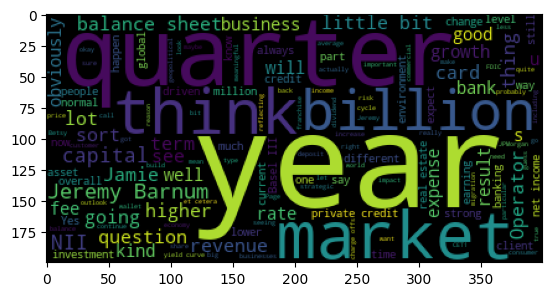

In [6]:
wc = WordCloud().generate(txt)
plt.imshow(wc)